# Introduction to NN with PyTorch

PyTorch is an open source machine learning framework based on the Torch library. It has a rich ecosystem of libraries, tools, and more to support development. It is highly optimized for deep learning using both GPUs and CPUs.
It was primarily developed by Facebook's AI Research lab (FAIR) and relased back in 2016.

It is an open-source framework and documentation is available at [Pytorch](https://pytorch.org/docs/stable/index.html).

The ``torchvision`` package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [1]:
import torch
import torchvision

from torchvision import transforms, datasets


train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

For the sake of introduction, let's play a little bit with the ``MNIST`` dataset.

Now, let's make some imports:

In [2]:
import torch.nn as nn
import torch.nn.functional as F

The ``torch.nn`` import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).

The ``torch.nn.functional`` area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. 

To make our model, we're going to create a class. We'll call this class ``net`` and this net will inhereit from the ``nn.Module`` class:

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Next, let's calculate loss and specify the optimizer:

In [4]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [5]:
for epoch in range(3): 
    for data in trainset:  
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  

tensor(0.3178, grad_fn=<NllLossBackward>)
tensor(0.2383, grad_fn=<NllLossBackward>)
tensor(0.2678, grad_fn=<NllLossBackward>)


In [6]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.97


## TESTING

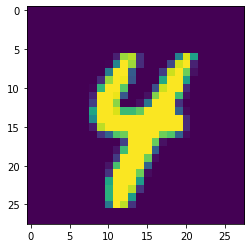

Prediction:
tensor(4)


In [10]:
import matplotlib.pyplot as plt

plt.imshow(X[7].view(28,28))
plt.show();

print("Prediction:")
print(torch.argmax(net(X[7].view(-1,784))[0]))

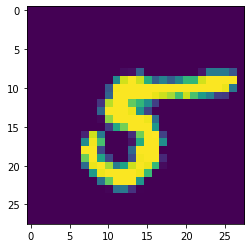

Prediction:
tensor(5)


In [11]:
plt.imshow(X[8].view(28,28))
plt.show();

print("Prediction:")
print(torch.argmax(net(X[8].view(-1,784))[0]))

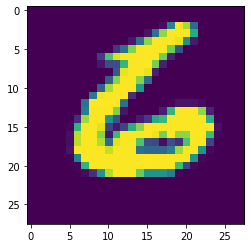

Prediction:
tensor(6)


In [12]:
plt.imshow(X[9].view(28,28))
plt.show();

print("Prediction:")
print(torch.argmax(net(X[9].view(-1,784))[0]))